### Word Embeddings



In order to work with text data, we need to convert the text into numerical data. One way to do this is to use word embeddings. Word embeddings are a type of word representation that maps words to vectors of real numbers.

Similar words will have similar vectors, and different words will have different vectors.

We can use pre-trained word embeddings like GloVe, Word2Vec, or FastText.

We can also train our own word embeddings using Word2Vec or FastText.

Values in the following vectors are not important, they are just for demonstration.Important idea is that similar words have similar numerical representations and difference between man-woman is the almost same as difference between king-queen.This means that they numerically represent the meaning of the words.

Let's see one of them in action.


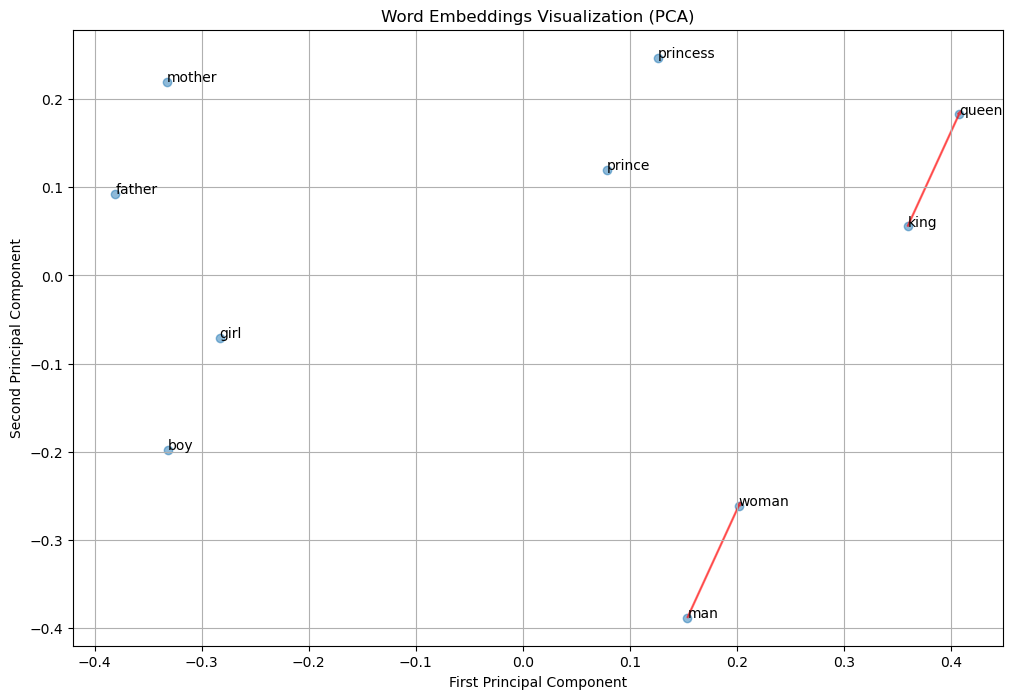


Analogy: man : woman :: king : queen
Relationship similarity: 1.000

Other gender pair similarities:
boy-girl similarity: 0.976
father-mother similarity: 0.983
prince-princess similarity: 0.985


In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# Manually define 10 word vectors (300-dimensional vectors simplified to 10 dimensions for demonstration)
# These are simplified random vectors just for demonstration
manual_vectors = {
    'man':     np.array([0.2, 0.3, 0.1, 0.4, 0.1, 0.2, 0.3, 0.4, 0.2, 0.1]).reshape(1, -1),
    'woman':   np.array([0.3, 0.4, 0.1, 0.3, 0.1, 0.3, 0.3, 0.4, 0.2, 0.1]).reshape(1, -1),
    'king':    np.array([0.5, 0.6, 0.2, 0.3, 0.2, 0.1, 0.4, 0.3, 0.1, 0.2]).reshape(1, -1),
    'queen':   np.array([0.6, 0.7, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.1, 0.2]).reshape(1, -1),
    'prince':  np.array([0.4, 0.5, 0.3, 0.2, 0.3, 0.1, 0.3, 0.2, 0.2, 0.3]).reshape(1, -1),
    'princess':np.array([0.5, 0.6, 0.3, 0.1, 0.3, 0.2, 0.3, 0.2, 0.2, 0.3]).reshape(1, -1),
    'boy':     np.array([0.1, 0.2, 0.4, 0.3, 0.2, 0.3, 0.2, 0.1, 0.3, 0.4]).reshape(1, -1),
    'girl':    np.array([0.2, 0.3, 0.4, 0.2, 0.2, 0.4, 0.2, 0.1, 0.3, 0.4]).reshape(1, -1),
    'father':  np.array([0.3, 0.2, 0.5, 0.1, 0.4, 0.2, 0.1, 0.2, 0.4, 0.3]).reshape(1, -1),
    'mother':  np.array([0.4, 0.3, 0.5, 0.0, 0.4, 0.3, 0.1, 0.2, 0.4, 0.3]).reshape(1, -1)
}

vocab = list(manual_vectors.keys())
word_vectors = np.vstack([manual_vectors[word] for word in vocab])

# Use PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot the words
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], alpha=0.5)

# Add word labels
for i, word in enumerate(vocab):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

# Draw arrows to show relationships
def plot_analogy(w1, w2, w3, w4):
    i1, i2, i3, i4 = [vocab.index(w) for w in [w1, w2, w3, w4]]
    plt.arrow(word_vectors_2d[i1, 0], word_vectors_2d[i1, 1],
             word_vectors_2d[i2, 0] - word_vectors_2d[i1, 0],
             word_vectors_2d[i2, 1] - word_vectors_2d[i1, 1],
             color='r', alpha=0.5)
    plt.arrow(word_vectors_2d[i3, 0], word_vectors_2d[i3, 1],
             word_vectors_2d[i4, 0] - word_vectors_2d[i3, 0],
             word_vectors_2d[i4, 1] - word_vectors_2d[i3, 1],
             color='r', alpha=0.5)

# Plot man->woman and king->queen relationships
plot_analogy('man', 'woman', 'king', 'queen')

plt.title('Word Embeddings Visualization (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()

# Show the analogy using scikit-learn's cosine_similarity
def print_analogy(w1, w2, w3, w4):
    print(f"\nAnalogy: {w1} : {w2} :: {w3} : {w4}")
    v1 = manual_vectors[w2] - manual_vectors[w1]  # woman - man
    v2 = manual_vectors[w4] - manual_vectors[w3]  # queen - king
    similarity = cosine_similarity(v1, v2)[0][0]
    print(f"Relationship similarity: {similarity:.3f}")

print_analogy('man', 'woman', 'king', 'queen')

# Show additional gender pair similarities
print("\nOther gender pair similarities:")
gender_pairs = [
    ('boy', 'girl'),
    ('father', 'mother'),
    ('prince', 'princess')
]

for w1, w2 in gender_pairs:
    similarity = cosine_similarity(manual_vectors[w1], manual_vectors[w2])[0][0]
    print(f"{w1}-{w2} similarity: {similarity:.3f}")





### Tokenization

Before getting our word embeddings, we need to tokenize our text data.

Tokenization is the process of splitting the text into smaller units called tokens.

Tokens can be words, phrases, or other units. For example, in the sentence "I love programming in Python", the tokens are "I", "love", "programming", "in", "Python".


Using the-verdict.txt file, we will tokenize the text data.




In [3]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [4]:
import re
text = "I love programming in Python."
result = re.split(r'(\s)', text)
print(result)

['I', ' ', 'love', ' ', 'programming', ' ', 'in', ' ', 'Python.']


Note: Removing whitespaces is not a good idea, because we will lose information about the sentence structure. For example if we are coding in python we might lose information about the indentation.

In [5]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(len(preprocessed))

4690


### Converting tokens into token ids

We need to accociate each token with a unique id. This way we can use the tokens in our model.
For that  we will use a vocabulary dictionary.

Whole text => tokens => token ids


In [6]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
print(vocab_size)

1130


In [7]:
vocab = {token:integer for integer,token in enumerate(all_words)}
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


Simple Text tokenizer:

In [8]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab            #1
        self.int_to_str = {i:s for s,i in vocab.items()}        #2

    def encode(self, text):         #3
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):         #4
        text = " ".join([self.int_to_str[i] for i in ids]) 

        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)    #5
        return text

In [9]:
tokenizer = SimpleTokenizerV1(vocab)
text = """"It's the last he painted, you know," 
       Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [10]:
print(tokenizer.decode(ids))

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


It is not guaranteed that every word in a new text will be present in the vocabulary.

In [11]:
text="Hello my name is Barkin"
try:
    ids = tokenizer.encode(text)
    print(ids)
except KeyError as e:
    print(f"Word {e} not found in vocabulary")



Word 'Hello' not found in vocabulary


### Special context tokens

In order to address this problem we need to create special tokens to represent unknown words

<|unk|> : Token to represent unknown words

<|endoftext|> : Token to represent end of text

In [13]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_tokens)}

print(len(vocab.items()))

#Before no of tokens was 1130

1132


In [14]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [16]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        #this is new
        preprocessed = [item if item in self.str_to_int            #1
                        else "<|unk|>" for item in preprocessed]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])

        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)    #2
        return text

Let's try again


In [19]:
text1="Hello my name is Barkin"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))
tokenizer=SimpleTokenizerV2(vocab=vocab)
try:
    ids = tokenizer.encode(text)
    print(ids)
except KeyError as e:
    print(f"Word {e} not found in vocabulary")

[1131, 697, 1131, 584, 1131, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]


In [20]:
print(tokenizer.decode(tokenizer.encode(text)))

<|unk|> my <|unk|> is <|unk|> <|endoftext|> In the sunlit terraces of the <|unk|>.


### Byte-Pair encoding

A better way to approach this is to use BPE. Algorithm breaks down the unknown words into smaller known tokens. For example "akwirw ier"  which is a unknown word becomes => "Ak" , "w" , "ir" , "w" , "" , "ier"

It also combines frequently combined tokens into new seperate token.For example if tokens 556 78 occur together then they are mapped into a new token like 55678.

In [22]:
from importlib.metadata import version
import tiktoken
print("tiktoken version:", version("tiktoken"))

tokenizer = tiktoken.get_encoding("gpt2")

text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace."
)
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

strings = tokenizer.decode(integers)
print(strings)


tiktoken version: 0.8.0
[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]
Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


In [29]:
unkword = "Akwirw ier"

ids = tokenizer.encode(unkword)

print(ids)

for id in ids:
    
    print(tokenizer.decode([id]))

[33901, 86, 343, 86, 220, 959]
Ak
w
ir
w
 
ier


### Data sampling with a sliding window

Since we will try to predict the next word in a sequence every sequence can be seen as smaller sequences.

For example 

LLMs try to predict one word at a => time 

can also be :

LLMs try => to

LLMs try to => predict

LLMs try to predict => one

...

LLMs try to predict one word at a => time 




In [31]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [38]:
#Removing first 50 tokens for demonstration purposes

enc_sample = enc_text[50:]

#Sliding x by one results in desired y in each index
context_size = 4         #1
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print(f"x: {x}")
print(f"y:      {y}")


for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print("\n")
    
    print(context, "---->", desired)

    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))
    




x: [290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


[290] ----> 4920
 and ---->  established


[290, 4920] ----> 2241
 and established ---->  himself


[290, 4920, 2241] ----> 287
 and established himself ---->  in


[290, 4920, 2241, 287] ----> 257
 and established himself in ---->  a


When we efficiently implement this in pytorch they should be contained in tensor


In [40]:
import torch
from torch.utils.data import Dataset, DataLoader
class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt)    #1

        for i in range(0, len(token_ids) - max_length, stride): 
            # shifting the y by 1 to get desired tokens for each step.
            # max length is the context size.
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):    #3
        return len(self.input_ids)

    def __getitem__(self, idx):         #4
        return self.input_ids[idx], self.target_ids[idx]
    

def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):
    tokenizer = tiktoken.get_encoding("gpt2")                         #1
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)   #2
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,     #3
        num_workers=num_workers     #4
    )

    return dataloader

Using stride =1 is essentially same thing as shifting x by 1 and getting labels.Which means that we are just sliding window by 1 therefore we can think of stride as quantity of how much we are sliding the window



In [42]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)
data_iter = iter(dataloader)      #1
first_batch = next(data_iter)
print(first_batch)


second_batch = next(data_iter)
print(second_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]
[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


### Creating token embeddings

Since we have our text tokenized it is time to represent them as token embeddings.Normally these embeddings are also parameters that needs to be optimized but for now we will use random weights and assume that they are correct.

We will try to represent what it would lkike to have 6 words with 3 dimensions.

In [43]:
input_ids = torch.tensor([2, 3, 5, 1])
vocab_size = 6
output_dim = 3

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)


Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


This means that word indexed with 0 represented as [0.3374 ,-0.1778 , -0.1690 ]

If we want access tokens 2,3,5,1 which are a example of possible input:

In [44]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


### Encoding word  positions

While we are representing the tokens we also want to encode information of where these tokens actually are in the sequence there are 2 ways of doing this:

Relative positioning: We are encoding the information of how much the tokens are away from each other.

Absolute positioning: We are encoding the information of where tokens exactly are in the sequence

Best choice depends on the application.

In [45]:
vocab_size = 50257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
   stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


This means that this batch has 8 examples consisting of 4 words with 256 dimensions.

In [46]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [47]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


0 1 2 or 3 is added depending of the position of the token.

In [48]:
torch.arange(context_length)


tensor([0, 1, 2, 3])

In [49]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)



torch.Size([8, 4, 256])
